###Scrapping Data

In [ ]:
pip install google-play-scraper #install package google play scrape

In [ ]:
#import package yang diperlukan
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
#mengurutkan review dan mengambil review dari aplikasi
from google_play_scraper import Sort, reviews

#mengambil review dari aplikasi Grab yang terbaru,
#dgn jumlah maksimum review yg diambil 7000 review
hasil, continuation_token = reviews ('com.grabtaxi.passenger',lang = 'id', country = 'id',
                 sort = Sort.NEWEST, count = 7000,
                 filter_score_with= None)

In [ ]:
#mengubah data review menjadi dataframe
df_data = pd.DataFrame(np.array(hasil), columns=['review'])

#memisahkan kolom-kolom agar sesuai
df_data = df_data.join(pd.DataFrame(df_data.pop('review').tolist()))

#menampilkan 5 baris review
df_data.sample(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
2403,f1f2ab96-59c9-4a51-a617-d290c0eede01,zainal zainal,https://play-lh.googleusercontent.com/a/AAcHTt...,aplikasi cuma mentingin pendapatan doang. udh ...,1,0,5.240.0,2023-06-07 07:04:31,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApab...,2023-06-07 09:07:30,5.240.0
655,501aeac4-0972-41e2-ba19-81477c6530d2,Hepri Hadi,https://play-lh.googleusercontent.com/a-/AD_cM...,baik,5,0,5.256.0,2023-06-17 10:09:17,None,NaT,5.256.0
3696,3c49a4eb-7622-4d24-9326-e95d34f8183f,nanaz 9093,https://play-lh.googleusercontent.com/a-/AD_cM...,Ter the best,5,0,5.255.0,2023-05-30 10:26:28,None,NaT,5.255.0
5894,69f18ece-a113-41b1-8dfd-90676607a9be,Darmo Demo,https://play-lh.googleusercontent.com/a/AAcHTt...,Grab bangsattttt anjingggg perusahaan kapitali...,1,0,None,2023-05-17 08:28:33,None,NaT,None
2152,64e3478a-9efa-4dc9-b5d1-757fba3d59f9,Aedy Kay Channel,https://play-lh.googleusercontent.com/a-/AD_cM...,ok,5,0,5.251.1,2023-06-08 15:24:14,Hi Kak. Terima kasih sudah jadi pengguna setia...,2023-06-09 00:29:07,5.251.1


In [ ]:
#melihat jumlah baris
len(df_data)

7000

In [ ]:
#memilih kolom-kolom tertentu
data = df_data[['at','userName','score','content']]

#menampilkan 5 baris
data.sample(5)

,at,userName,score,content
2114,2023-06-09 01:30:48,Wisang Pirandy,5,Bagus pelayanan nya
761,2023-06-16 19:04:34,Arvhino Rashaad,5,terimakasih bapak
1231,2023-06-13 22:54:28,Syamferiy Feri,5,cepat dan tepat
5380,2023-05-20 09:13:12,udin,5,terima kasih
3616,2023-05-31 04:32:59,Hoohtenan Ya,3,"Resto tutup, uang pake ovo belum balik."


In [ ]:
#engurutkan baris berdasarkan kolom 'at' dan mengurutkan nya secara menurun
data_sorted = data.sort_values(by = 'at', ascending =False)

#menampilkan 5 baris teratas
data_sorted.head(5)

,at,userName,score,content
0,2023-06-21 09:36:44,Yunus Sitinjak,3,Tetap saya sumpah kalian semua ku Khusus yang ...
1,2023-06-21 06:57:12,Ace Ace,5,mantap
2,2023-06-21 06:51:04,Didi Junaedi,5,ramah
3,2023-06-21 06:50:45,Budi Taufik,5,bagus
4,2023-06-21 06:50:25,fauziah nf,5,ya lumayan lah


In [ ]:
#menyimpan data ke dalam file ecel
data_sorted.to_excel('Ulasan.xlsx', index = False)

###Preprocessing

In [ ]:
#install sastrawi
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
#install nltk
pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [ ]:
dt = pd.read_excel('Ulasan.xlsx')
# dt = dt[:100]
dt.head()

,at,userName,score,content
0,2023-06-21 09:36:44,Yunus Sitinjak,3,Tetap saya sumpah kalian semua ku Khusus yang ...
1,2023-06-21 06:57:12,Ace Ace,5,mantap
2,2023-06-21 06:51:04,Didi Junaedi,5,ramah
3,2023-06-21 06:50:45,Budi Taufik,5,bagus
4,2023-06-21 06:50:25,fauziah nf,5,ya lumayan lah


In [ ]:
with open('slang.txt', 'r') as data:
    x = []
    y = []
    for line in data:
        p = line.split()
        x.append(p[0])
        y.append(p[1])



In [ ]:
slang = dict(zip(x,y))
slang['good'] = 'bagus'
slangs={'yg':'yang', 'tdk':'tidak', 'pd':'pada', 'mlh':'malah',
'jgn':'jangan', 'jg':'juga', 'tp':'tapi', 'blkg': 'belakang',
'dr':'dari', 'klo':'kalau', 'lg':'lagi','sj':'saja','bwt':'buat','cm':'cuma','sya':'saya','kalo':'kalau',
'kl':'kalau','dg':'dengan','krn':'karena', 'ank':'anak', 'maen':'main','bgt':'banget', 'rp':'rupiah', 'sat' : 'saat', 'sprtinya':'sepertinya','mlm':'malam',
'lbh':'lebih', 'tuju': 'tujuan','mayan' : 'lumayan', 'sat':'saat', 'sgt':'sangat', 'pol' : 'sangat', 'dg':'dengan','sabi':'bisa', 'byk' : 'banyak', 'gw' : 'aku',
'bs':'bisa','oeang':'orang','lemot':'siput','gk':'tidak','forno':'porno','elite':'keren','good':'bagus','nice':'bagus',
'cool':'bagus','suka':'cinta','love':'cinta','burik':'jelek','buriq':'jelek','epic':'bagus','lag':'siput','ok':'mantap','mantul':'mantap','jlek':'jelek','mksih':'hebat','top':'mantap',
'gercep':'cepat','jos':'bagus','sip':'bagus','awesome':'keren','best':'terbaik','mntap':'mantap','mantab':'mantap','sip':'bagus','oke':'bagus','mantul':'mantap','pk':'ok','bgus':'bagus',
'mkzi':'terimakasih','alhamdulillah':'bagus','mkazi':'terimakasih','ngesel':'menyesal','baget':'sanget','biker':'sopir','kenyamanannya':'kenyamanan','respon':'tanggapan','tangap':'tanggap',
'bagis':'bagus','thank you':'terimakasih','terimaksih':'terimakasih'}
slang.update(slangs)

slang

{'7an': 'tujuan',
 '@': 'di',
 'ababil': 'abg',
 'abis': 'habis',
 'acc': 'accord',
 'ad': 'ada',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'adoh': 'aduh',
 'afaik': 'as',
 'aha': 'tertawa',
 'ahaha': 'haha',
 'aing': 'saya',
 'aj': 'saja',
 'aja': 'saja',
 'ajep-ajep': 'dunia',
 'ajj': 'saja',
 'ak': 'saya',
 'aka': 'dikenal',
 'akika': 'aku',
 'akko': 'aku',
 'akkoh': 'aku',
 'akku': 'aku',
 'akuwh': 'aku',
 'akyu': 'aku',
 'alay': 'norak',
 'aljasa': 'asal',
 'alow': 'halo',
 'ama': 'sama',
 'ambilin': 'ambilkan',
 'ambl': 'ambil',
 'ancur': 'hancur',
 'anjir': 'anjing',
 'anjrit': 'anjing',
 'ank': 'anak',
 'anter': 'antar',
 'ap': 'apa',
 'ap2': 'apa-apa',
 'apaan': 'apa',
 'apasih': 'apa',
 'ape': 'apa',
 'apes': 'sial',
 'aplot': 'unggah',
 'aps': 'apa',
 'apva': 'apa',
 'aq': 'saya',
 'aqu': 'aku',
 'aquwh': 'aku',
 'asap': 'sesegera',
 'asbun': 'asal',
 'aseek': 'asyik',
 'aseekk': 'asyik',
 'asek': 'asyik',
 'asekk': 'asyik',
 'aseknya': 'asyiknya',
 'asem': 'asam',
 'asoy': 'a

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()
anti_stem = ['lemot','ok','memuaskan','layanan','maaf','good','nyaman']

In [ ]:
factory = StopWordRemoverFactory()
more_sw = ['tak','jd','per','nya','nd','lot','nan','lah','deh','the','is','yhj','iya','dulu','ap','job','jobs','memang','sangat','papa','mau','jadi',
           'kalau','makin','buat','sama','terus','selalu','sekali','lebih','dong','sat','cuma','mana','banget','padahal','bahkan','car','rb','apk','ovo','sekarang',
           'pelayanan','update','driver','drivernya','aplikasi','terima','titik','order','mud','mh','wao','yh','sngt','kali','sering','kaz','poko','promo','mkzi','promo','kas','kaz',
           'bapak','orang','bpk']
sw = factory.get_stop_words() + more_sw

In [ ]:
hasil_cleaning = []

for kata in dt['content']:
  prep = re.sub(r'\W',' ',str(kata))
  prep = prep.lower()
  prep = re.sub(r'\d+',' ',prep)
  prep = re.sub(r'\s+[a-z]\s+',' ',prep)

  kalimat = prep.split()
  correction = [slang[kata] if kata in slang else kata for kata in kalimat]
  prep = ' '.join(correction)

  pattern = re.compile(r'(.)\1{1,}',re.DOTALL)
  prep = pattern.sub(r'\1',prep)

  hasil_cleaning.append(prep)

In [ ]:
clean = pd.DataFrame(hasil_cleaning,columns = ['Hasil Cleaning'])
clean.to_excel('Hasil Cleaning.xlsx')
clean.head()

,Hasil Cleaning
0,tetap saya sumpah kalian semua ku khusus yang ...
1,mantap
2,ramah
3,bagus
4,iya lumayan lah


In [ ]:
hasil_sw = []
for sent in hasil_cleaning:
  temp =[x for x in word_tokenize(sent) if x not in sw]
  prep = ' '.join(temp)
  hasil_sw.append(prep)

In [ ]:
hasilsw = pd.DataFrame(hasil_sw,columns = ['Hasil SW'])
hasilsw.to_excel('Hasil SW.xlsx')
hasilsw.head(5)

,Hasil SW
0,tetap sumpah kalian semua ku khusus kerja meda...
1,mantap
2,ramah
3,bagus
4,lumayan


In [ ]:
hasil_prep = []
hasil_stem = []
for words in hasil_sw:
  words = words.split()
  temp = []

  for word in words:
    if word not in anti_stem:
      temp.append(stemmer.stem(word))
      hasil_stem.append(word)

    else:
      temp.append(word)
      hasil_stem.append(word)

  prep = ' '.join(temp)
  prep = re.sub(r'\s+',' ',prep,flags = re.I)
  hasil_prep.append(prep)
hasil_stem[:10]

['tetap',
 'sumpah',
 'kalian',
 'semua',
 'ku',
 'khusus',
 'kerja',
 'medan',
 'ku',
 'tungu']

In [ ]:
stem = pd.DataFrame(hasil_stem,columns = ["Hasil Stemming"])
stem.to_excel('Hasil Stemming.xlsx',index =False)
stem = pd.read_excel('Hasil Stemming.xlsx')
stem.tail(5)


,Hasil Stemming
25650,onkir
25651,pbayaran
25652,biasa
25653,skrang
25654,laju


In [ ]:
dt_prep = pd.DataFrame(hasil_prep,columns = ['Hasil Preprocessing'])
dt_prep.to_excel('Hasil Prep.xlsx')
dt_prep.sample(5)

,Hasil Preprocessing
6010,bagus
3618,tingkat kan
6080,jalan baik
2025,tampil ui tarik mikat pelang beda bab
3240,banyak klam satu


In [ ]:
dt = pd.read_excel('Hasil Prep.xlsx')
dt['Hasil Preprocessing'].replace('', np.nan, inplace=True)
dt = dt['Hasil Preprocessing']
dt = dt.dropna()
dt

0       tetap sumpah kalian semua ku khusus kerja meda...
1                                                  mantap
2                                                   ramah
3                                                   bagus
4                                                 lumayan
                              ...                        
6995                                               mantap
6996                                                bagus
6997                                          terimakasih
6998                     naik onkir pbayaran biasa skrang
6999                                                 laju
Name: Hasil Preprocessing, Length: 6843, dtype: object

### DATA LABELLING

In [ ]:
dicts = pd.read_excel('NRC.xlsx')

In [ ]:
positive=[]
negative=[]

for i in range(1,len(dicts)):
  kata= dicts.iloc[i,1]

  if (dicts.iloc[i,6])==1:
    positive.append(kata)
  if (dicts.iloc[i,7])==1:
    negative.append(kata)

processed_comments= dt
dt_label=[]

for kalimat in processed_comments:
    baris=[]
    baris.append(kalimat)

    f_sentimenpositif=0
    f_sentimennegatif=0

    y= str(kalimat)

    for teks in y.split():
      for j in range(0,len(positive)-1):
        if teks==positive[j]:
          f_sentimenpositif+=1
      for j in range(0,len(negative)-1):
        if teks==negative[j]:
          f_sentimennegatif+=1

    l_sentimenne=0
    l_sentimenp=0
    l_sentimenn=0

    if f_sentimenpositif-f_sentimennegatif==0:
      l_sentimenne=1

    elif f_sentimenpositif-f_sentimennegatif>=0:
        l_sentimenp=1
    else:
      l_sentimenn=1

    baris.append(l_sentimenp)
    baris.append(l_sentimenn)
    baris.append(l_sentimenne)
    dt_label.append(baris)

In [ ]:
data_berlabel=pd.DataFrame(dt_label, columns=['Review','Positif','Negatif','Netral'])
data_berlabel.sample(5)

,Review,Positif,Negatif,Netral
5888,bagus mudah aktivitas manusia,1,0,0
3187,lama sih kendala,0,0,1
3385,baru jam,0,0,1
5937,baik,1,0,0
4362,thebast,0,0,1


In [ ]:
data_berlabel.to_excel('Data Berlabel.xlsx',index = False)

In [ ]:
data_berlabel = pd.read_excel('Data Berlabel.xlsx')
data_berlabel.dropna()
data_berlabel.sample(5)

,Review,Positif,Negatif,Netral
6293,moga tambah baik bagus,1,0,0
1068,bantu,0,0,1
4062,god,0,0,1
6355,kemudi grabike amanah ksh,0,0,1
388,kemudi ramah mobil bersih,1,0,0


In [ ]:
data_berlabel

,Review,Positif,Negatif,Netral
0,tetap sumpah kalian semua ku khusus kerja meda...,0,1,0
1,mantap,1,0,0
2,ramah,1,0,0
3,bagus,1,0,0
4,lumayan,1,0,0
...,...,...,...,...
6838,mantap,1,0,0
6839,bagus,1,0,0
6840,terimakasih,0,0,1
6841,naik onkir pbayaran biasa skrang,1,0,0


In [ ]:
dt = data_berlabel
dt['label'] = ''
dt

,Review,Positif,Negatif,Netral,label
0,tetap sumpah kalian semua ku khusus kerja meda...,0,1,0,
1,mantap,1,0,0,
2,ramah,1,0,0,
3,bagus,1,0,0,
4,lumayan,1,0,0,
...,...,...,...,...,...
6838,mantap,1,0,0,
6839,bagus,1,0,0,
6840,terimakasih,0,0,1,
6841,naik onkir pbayaran biasa skrang,1,0,0,


In [ ]:
for i in dt.index:
  if dt.at[i,'Negatif'] == 1:
    dt.at[i,'label'] = -1

  elif dt.at[i,'Positif'] ==1:
    dt.at[i,'label'] = 1

  elif dt.at[i,'Netral'] == 1:
    dt.at[i,'label'] = 0


In [ ]:
dt

,Review,Positif,Negatif,Netral,label
0,tetap sumpah kalian semua ku khusus kerja meda...,0,1,0,-1
1,mantap,1,0,0,1
2,ramah,1,0,0,1
3,bagus,1,0,0,1
4,lumayan,1,0,0,1
...,...,...,...,...,...
6838,mantap,1,0,0,1
6839,bagus,1,0,0,1
6840,terimakasih,0,0,1,0
6841,naik onkir pbayaran biasa skrang,1,0,0,1


In [ ]:
positif = dt[dt['label']==1] ['label'].count()
negatif = dt[dt['label']==-1] ['label'].count()
netral = dt[dt['label']==0] ['label'].count()
print(positif)
print(negatif)
print(netral)

4604
520
1719


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vektorizer = TfidfVectorizer()
vektor_dt = vektorizer.fit_transform(dt['Review'].values.astype('U'))


In [ ]:
vektorizer.fit_transform(dt['Review'].values.astype('U')).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import numpy as np
matrix = pd.DataFrame(vektor_dt.toarray(),columns = vektorizer.get_feature_names_out())
pd.set_option('display.precision',2)
matrix

,abad,abag,abai,abang,abg,abng,ac,acount,active,acuanya,...,yth,yuiou,yukon,zalim,zf,zip,zl,zo,zola,zuhud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
jumlah_fitur = vektorizer.get_feature_names_out()
print(len(jumlah_fitur))

3845


In [ ]:
obj_vektorizer = TfidfVectorizer()

vektor_dt = obj_vektorizer.fit_transform(dt['Review'].values.astype('U'))

In [ ]:
sum_fitur = obj_vektorizer.get_feature_names_out()
print(sum_fitur)
print()
print('Jumlah Fitur:',len(sum_fitur))
print()
print(vektor_dt)

['abad' 'abag' 'abai' ... 'zo' 'zola' 'zuhud']

Jumlah Fitur: 3845

  (0, 2471)	0.16024302612839544
  (0, 1772)	0.15313281657645075
  (0, 1249)	0.10212567764114239
  (0, 3511)	0.1174141886457549
  (0, 1359)	0.1409778330635264
  (0, 1218)	0.11666786603767766
  (0, 714)	0.16024302612839544
  (0, 762)	0.14808804261547107
  (0, 1254)	0.12271496619623092
  (0, 2981)	0.13202002841684365
  (0, 1861)	0.11819369183976981
  (0, 2729)	0.3204860522567909
  (0, 23)	0.29617608523094213
  (0, 2690)	0.21128925160005987
  (0, 1347)	0.24342527999731473
  (0, 277)	0.1359330591025467
  (0, 3622)	0.09974427071904446
  (0, 2079)	0.15313281657645075
  (0, 1629)	0.11666786603767766
  (0, 1655)	0.1359330591025467
  (0, 1759)	0.603822603756576
  (0, 3130)	0.09919622816519251
  (0, 1520)	0.13202002841684365
  (0, 3331)	0.13202002841684365
  (0, 3487)	0.10727705335555207
  :	:
  (6830, 1809)	0.12943221115707776
  (6830, 2630)	0.12435398950645536
  (6830, 2046)	0.11450459859690214
  (6830, 677)	0.12262656601708646

### ANALISIS SENTIMEN

In [ ]:
dt.drop(['Negatif','Positif','Netral'],axis = 1, inplace = True)


Positif: 4604
Negatif: 520
Netral: 1719


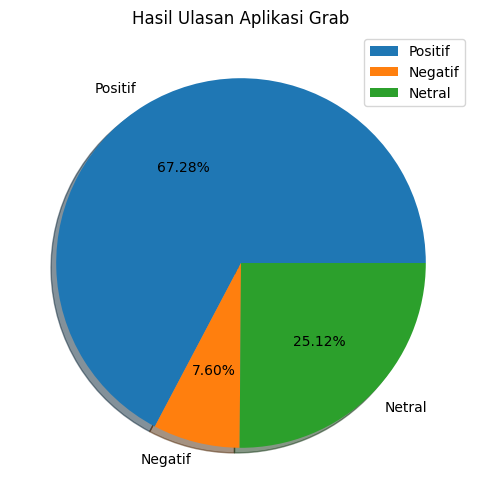

In [ ]:
import matplotlib.pyplot as plt

data_plot = pd.read_excel('Data Berlabel.xlsx')
positif = data_plot['Positif'].sum()
negatif = data_plot['Negatif'].sum()
netral = data_plot ['Netral'].sum()

label = ['Positif','Negatif','Netral']
jum = [positif,negatif,netral]

print(f'Positif: {positif}\nNegatif: {negatif}\nNetral: {netral}')

plt.figure(figsize = (6, 6))
plt.pie(jum,labels = label,autopct='%1.2f%%',shadow = True)
plt.legend()
plt.title('Hasil Ulasan Aplikasi Grab')
plt.show()

In [ ]:
token_freq = {}
for angka in stem['Hasil Stemming']:
     if angka in token_freq:
         token_freq[angka] += 1
     else:
         token_freq[angka] = 1




In [ ]:
import numpy as np

keys = list(token_freq.keys())
values = list(token_freq.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
print(sorted_dict)

{'laju': 1, 'bejat': 1, 'peringati': 1, 'mangkrak': 1, 'grabhemat': 1, 'pelanganya': 1, 'didik': 1, 'enga': 1, 'fisik': 1, 'cobain': 1, 'ᴀᴘʟɪᴋᴀsɪ': 1, 'mnjadi': 1, 'molorp': 1, 'lokal': 1, 'mhy': 1, 'matikan': 1, 'ngasi': 1, 'ganiat': 1, 'menghabiskan': 1, 'tai': 1, 'samping': 1, 'sebanding': 1, 'etalase': 1, 'bentuknya': 1, 'intal': 1, 'kuar': 1, 'ɢʀᴇᴘ': 1, 'helpdesknya': 1, 'sᴜᴋᴀ': 1, 'yakin': 1, 'berawal': 1, 'wajib': 1, 'ditempa': 1, 'lincah': 1, 'yea': 1, 'parung': 1, 'alam': 1, 'sutera': 1, 'ᴋᴀʀᴇɴᴀ': 1, 'pande': 1, 'berlomba': 1, 'lomba': 1, 'hasilkan': 1, 'ɴɪ': 1, 'keberadan': 1, 'buaget': 1, 'php': 1, 'gedeg': 1, 'suspend²': 1, 'arogan': 1, 'doctor': 1, 'dilempar': 1, 'sudahlah': 1, 'pengantinya': 1, 'diskountnya': 1, 'cerdik': 1, 'ngadain': 1, 'vocher': 1, 'dikenakan': 1, 'bong': 1, 'dihubungkan': 1, 'dwonlod': 1, 'belanjanya': 1, 'gulegeng': 1, 'pokimen': 1, 'tehelem': 1, 'masada': 1, 'bepae': 1, 'neher': 1, 'mantau': 1, 'pengunq': 1, 'dikecewain': 1, 'perumahan': 1, 'prefer'

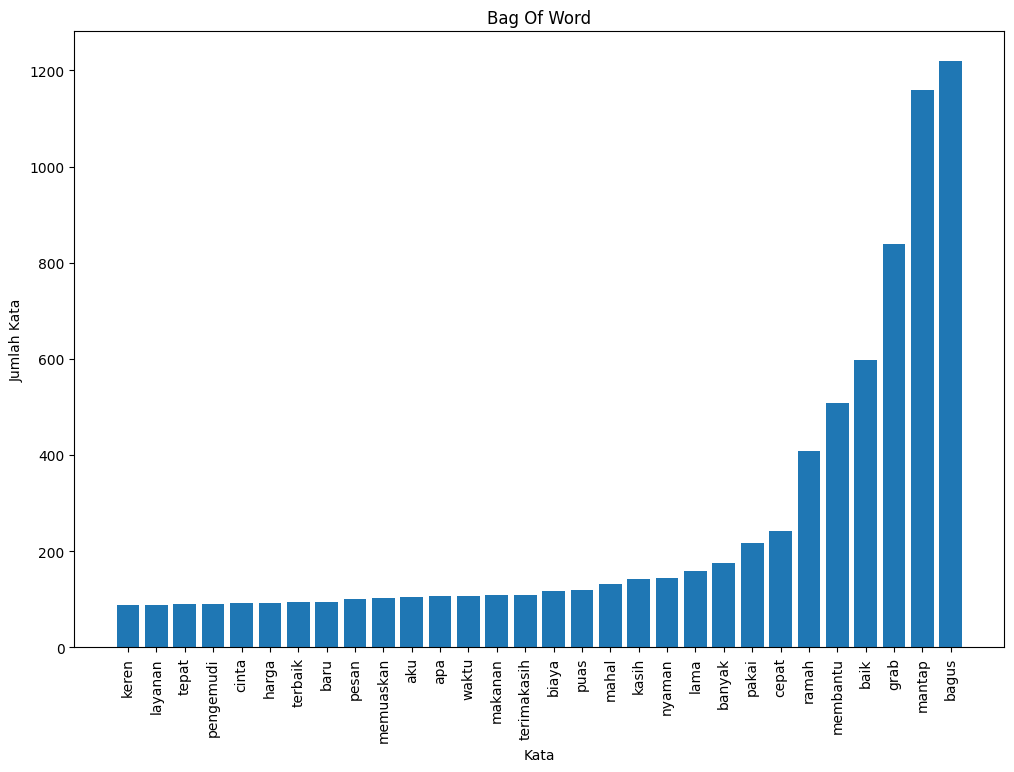

In [ ]:
keys = list(sorted_dict.keys())
values = list(sorted_dict.values())

x = keys[-30:]
y = values[-30:]
plt.figure(figsize= (12,8))
plt.bar(x, y)

plt.xlabel('Kata')
plt.ylabel('Jumlah Kata')
plt.title('Bag Of Word')

plt.xticks(rotation=90)

plt.show()

### Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
y = dt['label']
y = y.astype('int')
Xtrain,Xtest,Ytrain,Ytest = train_test_split(vektor_dt,y,test_size=0.2,random_state = 0)
vektor_dt

<6843x3845 sparse matrix of type '<class 'numpy.float64'>'
	with 23581 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
model = MultinomialNB()


In [ ]:
model.fit(Xtrain,Ytrain)

MultinomialNB()

In [ ]:
ypred = model.predict(Xtest)
print('Tabel Confussion Matrix')
print(confusion_matrix(Ytest,ypred,labels=[1,0,-1]))
print('\nTabel Akurasi')
print(classification_report(Ytest,ypred))

Tabel Confussion Matrix
[[948   6   0]
 [169 143   0]
 [ 65  25  13]]

Tabel Akurasi
              precision    recall  f1-score   support

          -1       1.00      0.13      0.22       103
           0       0.82      0.46      0.59       312
           1       0.80      0.99      0.89       954

    accuracy                           0.81      1369
   macro avg       0.87      0.53      0.57      1369
weighted avg       0.82      0.81      0.77      1369



In [ ]:
import seaborn as sns

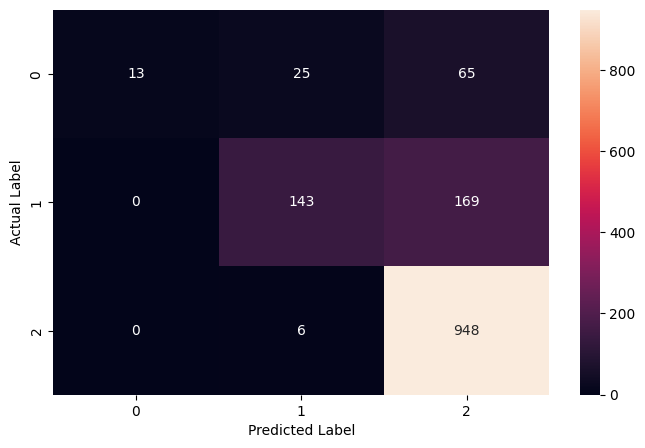

In [ ]:
f,ax = plt.subplots(figsize = (8,5))
sns.heatmap(confusion_matrix(Ytest,ypred),annot =True, fmt='.0f',ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:

print("Nilai Setiap Parameter Confusion Matrix")
print('='*50)
print('Accuracy Score:',accuracy_score(Ytest, ypred))
print("Precision Score : ",precision_score(Ytest, ypred,average= 'weighted'))
print("Recall Score : ",recall_score(Ytest, ypred,average= 'weighted'))
print('F1-Score: ',f1_score(Ytest, ypred,average = 'weighted' ))

Nilai Setiap Parameter Confusion Matrix
Accuracy Score: 0.8064280496712929
Precision Score :  0.8214396266917544
Recall Score :  0.8064280496712929
F1-Score:  0.769539907912492
